# Clusters

## Importações

In [2]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


Conjunto de dados clássico usado em Machine Learning: Iris.

In [6]:
iris = datasets.load_iris()

In [14]:
# Criando função para imprimir os dados no gráfico
def plot_clusters(data, labels, title):
    colors = ['red', 'green', 'purple', 'black']
    plt.figure(figsize=(8,4))
    for i, c, l in zip(range(-1,3), colors, ['Noise', 'Setosa', 'Versicolor', 'Virginica']):
        if i == -1:
            plt.scatter(data[labels==i, 0], data[labels==i, 3], c=colors[i], label = l, alpha=0.5, s=50, marker='x')
        else:
            plt.scatter(data[labels==i, 0], data[labels==i, 3], c=colors[i], label = l, alpha=0.5, s=50)
    
    plt.legend()
    plt.title(title)
    plt.xlabel("Comprimento da Sépala")
    plt.ylabel("Largura da Pétala")
    plt.show()

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Criação do 'Modelo' e Visualização dos Dados

In [7]:
# n_clusters define o número de clusters que vai ser gerado a partir dos dados
# Algoritmo K-Means
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(iris.data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


c:\Users\Emanuelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Emanuelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [9]:
resultados = confusion_matrix(iris.target, kmeans.labels_)
print(resultados)

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


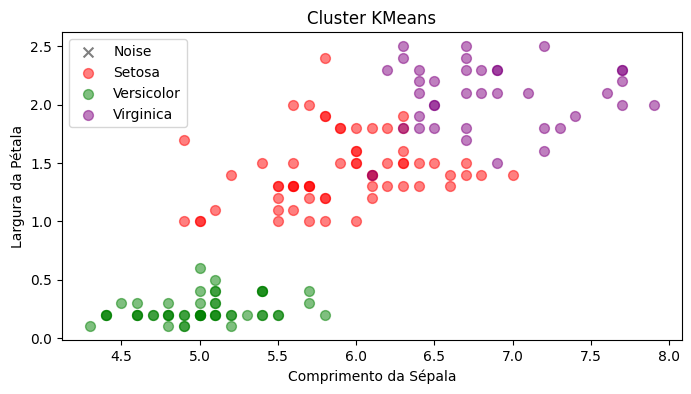

In [15]:
plot_clusters(iris.data, kmeans.labels_, 'Cluster KMeans')

In [10]:
# Funcionamento - eps = circunferência do agrupamento, min_samples = mínimo de elementos para considerar que é um cluster (resto é ruído)
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(iris.data)
print(dbscan_labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  3 -1  1 -1 -1  1  1  1  1  1  1  1 -1  3  1
  1  1  3  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


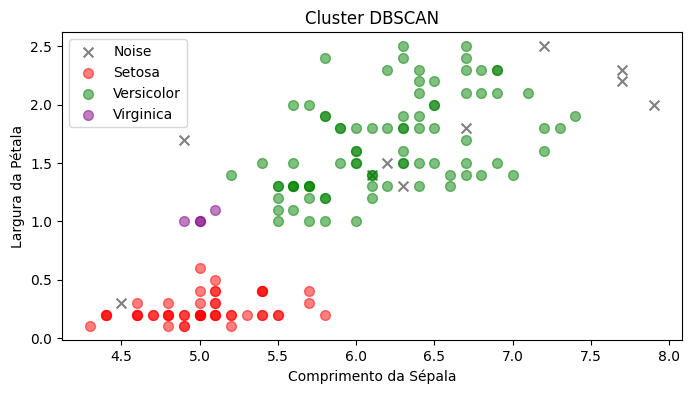

In [16]:
plot_clusters(iris.data, dbscan_labels, 'Cluster DBSCAN')

In [11]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(iris.data)
print(agglo_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


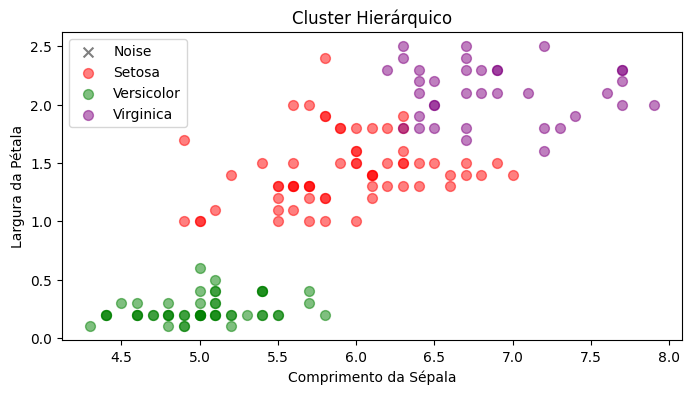

In [17]:
plot_clusters(iris.data, agglo_labels, 'Cluster Hierárquico')

In [12]:
resultados = confusion_matrix(iris.target, agglo_labels)
print(resultados)

[[ 0 50  0]
 [49  0  1]
 [15  0 35]]


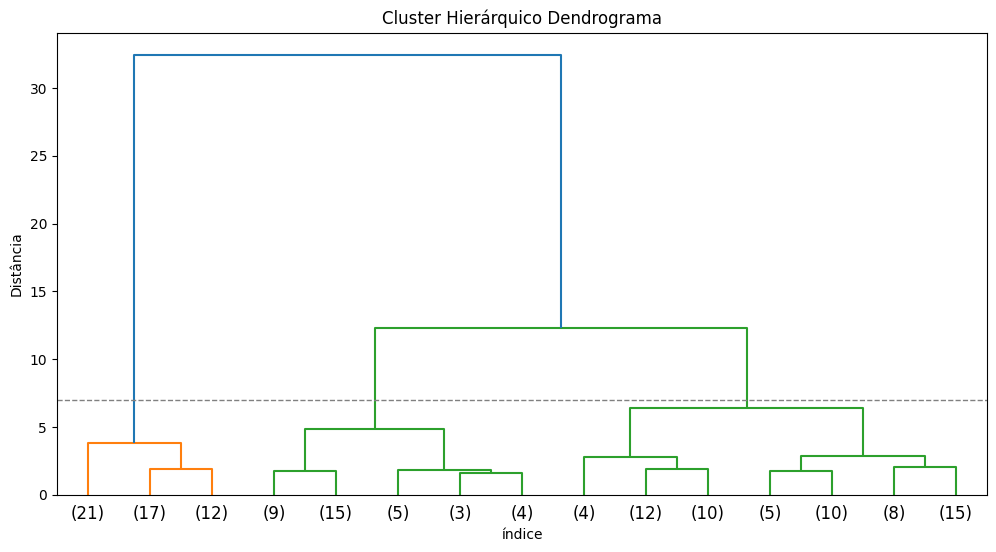

In [18]:
plt.figure(figsize=(12,6))
plt.title('Cluster Hierárquico Dendrograma')
plt.xlabel('índice')
plt.ylabel('Distância')
linkage_matrix = linkage(iris.data, method='ward') # method = função que é usada para calcular a distância entre os clusters. Ward = soma da diferença dos quadrados. 
dendrogram(linkage_matrix, truncate_mode='lastp', p=15) # lastp = usado para juntar os galhos do dendrograma, p = numero máximo de folhas que o dendrograma pode ter
plt.axhline(y=7, c='gray', lw=1, linestyle='dashed')
plt.show()